In [5]:
fn = '/Users/kot/ipython_notebook/work/kegpep2ec_kegpep2ec_sw.txt'

In [6]:
sum(1 for line in open(fn))

3594418

In [7]:
for i, line in enumerate(open(fn)):
    print (i, line)
    if i > 100:
        break

(0, '>>>EC:2.5.1.18;hsa:2952\n')
(1, 'EC:2.5.1.18;hsa:2952\t1605\t382.5\n')
(2, 'EC:2.5.1.18;hsa:2953\t834\t201.7\n')
(3, 'EC:4.5.1.3;phu:Phum_PHUM454040\t556\t136.5\n')
(4, 'EC:2.5.1.18_4.5.1.3;mdi:METDI2656\t302\t76.9\n')
(5, 'EC:1.11.1.9_2.5.1.18;dme:Dmel_CG4421\t289\t73.9\n')
(6, 'EC:2.5.1.18_4.5.1.1;dme:Dmel_CG10045\t265\t68.2\n')
(7, 'EC:1.11.1.9_2.5.1.18;dme:Dmel_CG4181\t264\t68.0\n')
(8, 'EC:5.2.1.2;rcu:RCOM_1299540\t220\t57.7\n')
(9, 'EC:1.11.1.-_1.8.4.-;rir:BN877_II1582\t187\t50.0\n')
(10, 'EC:2.5.1.18;ecc:c2027\t181\t48.5\n')
(11, 'EC:2.5.1.18;ecp:ECP_1580\t181\t48.5\n')
(12, 'EC:2.5.1.18;eco:b1635\t179\t48.1\n')
(13, 'EC:2.5.1.18_5.2.1.2;rno:681913\t177\t47.6\n')
(14, 'EC:2.5.1.18_5.2.1.2;dme:Dmel_CG9363\t171\t46.2\n')
(15, 'EC:1.11.1.-_1.8.4.-;lfa:LFA_0041\t169\t45.7\n')
(16, 'EC:2.5.1.18_5.2.1.2;dme:Dmel_CG9362\t163\t44.3\n')
(17, 'EC:5.2.1.4;reh:H16_B0875\t161\t43.9\n')
(18, 'EC:2.5.1.18_5.2.1.2;ctu:CTU_14400\t160\t43.6\n')
(19, 'EC:5.2.1.4;azo:azo2423\t159\t43.4\n')
(20

In [8]:
import re
pattern = re.compile(r"^>>>")
for i, line in enumerate(open(fn)):
    if pattern.match(line):
        print (i, line)
    if i > 100:
        break

(0, '>>>EC:2.5.1.18;hsa:2952\n')
(64, '>>>EC:5.2.1.8;hsa:653598\n')
(87, '>>>EC:3.5.3.15;hsa:353238\n')
(101, '>>>EC:2.7.1.22_2.7.1.173;hsa:27231\n')


In [9]:
import re
pattern = re.compile(r"^>>>")
for i, line in enumerate(open(fn)):
    if pattern.match(line):
        print (i, line.strip())
    if i > 100:
        break

(0, '>>>EC:2.5.1.18;hsa:2952')
(64, '>>>EC:5.2.1.8;hsa:653598')
(87, '>>>EC:3.5.3.15;hsa:353238')
(101, '>>>EC:2.7.1.22_2.7.1.173;hsa:27231')


In [10]:
import re
pattern = re.compile(r"^>>>")
for i, line in enumerate(open(fn)):
    if pattern.match(line):
        print (i, line.strip().replace('>>>', ''))
    if i > 100:
        break

(0, 'EC:2.5.1.18;hsa:2952')
(64, 'EC:5.2.1.8;hsa:653598')
(87, 'EC:3.5.3.15;hsa:353238')
(101, 'EC:2.7.1.22_2.7.1.173;hsa:27231')


In [11]:
import re
pattern = re.compile(r"^>>>")
for i, line in enumerate(open(fn)):
    if pattern.match(line):
        print (i, line.strip().replace('>>>', '').split(';'))
    if i > 100:
        break

(0, ['EC:2.5.1.18', 'hsa:2952'])
(64, ['EC:5.2.1.8', 'hsa:653598'])
(87, ['EC:3.5.3.15', 'hsa:353238'])
(101, ['EC:2.7.1.22_2.7.1.173', 'hsa:27231'])


In [12]:
import re
pattern = re.compile(r"^>>>")
for i, line in enumerate(open(fn)):
    if pattern.match(line):
        ec, gene = line.strip().replace('>>>', '').split(';')
        print (ec, gene)
    if i > 100:
        break

('EC:2.5.1.18', 'hsa:2952')
('EC:5.2.1.8', 'hsa:653598')
('EC:3.5.3.15', 'hsa:353238')
('EC:2.7.1.22_2.7.1.173', 'hsa:27231')


In [13]:
import re
pattern = re.compile(r"^>>>")
for i, line in enumerate(open(fn)):
    if pattern.match(line):
        ec, gene = line.strip().replace('>>>', '').split(';')
        ec = ['EC:' + str for str in ec.replace('EC:', '').split('_')]
        print (ec, gene)
    if i > 100:
        break

(['EC:2.5.1.18'], 'hsa:2952')
(['EC:5.2.1.8'], 'hsa:653598')
(['EC:3.5.3.15'], 'hsa:353238')
(['EC:2.7.1.22', 'EC:2.7.1.173'], 'hsa:27231')


In [15]:
import re
ec2genes = {}
pattern = re.compile(r"^>>>")
for i, line in enumerate(open(fn)):
    if pattern.match(line):
        ec, gene = line.strip().replace('>>>', '').split(';')
        
        ecs = []
        for str in ec.replace('EC:', '').split('_'):
            ecs.append('EC:' + str)
            
#        ecs = ['EC:' + str       for str in ec.replace('EC:', '').split('_')]
        
        for ec in ecs:
            if not ec2genes.has_key(ec):
                ec2genes.update({ec:[]})
            ec2genes[ec].append(gene)
    if i > 100:
        break
ec2genes

{'EC:2.5.1.18': ['hsa:2952'],
 'EC:2.7.1.173': ['hsa:27231'],
 'EC:2.7.1.22': ['hsa:27231'],
 'EC:3.5.3.15': ['hsa:353238'],
 'EC:5.2.1.8': ['hsa:653598']}

In [18]:
import re
ec2genes = {}
pattern = re.compile(r"^>>>")
pattern2 = re.compile(r"\t|\;")
for i, line in enumerate(open(fn)):
    if pattern.match(line):
        ec, gene = line.strip().replace('>>>', '').split(';')
        ecs = ['EC:' + str for str in ec.replace('EC:', '').split('_')]
        for ec in ecs:
            if not ec2genes.has_key(ec):
                ec2genes.update({ec:[]})
            if gene not in ec2genes[ec]:
                ec2genes[ec].append(gene)
    else:
        ec, gene, sw1, sw2 = re.split(pattern2, line.strip())
        ecs = ['EC:' + str for str in ec.replace('EC:', '').split('_')]
        print (ecs, gene, sw1, sw2)
    if i > 100:
        break
ec2genes

(['EC:2.5.1.18'], 'hsa:2952', '1605', '382.5')
(['EC:2.5.1.18'], 'hsa:2953', '834', '201.7')
(['EC:4.5.1.3'], 'phu:Phum_PHUM454040', '556', '136.5')
(['EC:2.5.1.18', 'EC:4.5.1.3'], 'mdi:METDI2656', '302', '76.9')
(['EC:1.11.1.9', 'EC:2.5.1.18'], 'dme:Dmel_CG4421', '289', '73.9')
(['EC:2.5.1.18', 'EC:4.5.1.1'], 'dme:Dmel_CG10045', '265', '68.2')
(['EC:1.11.1.9', 'EC:2.5.1.18'], 'dme:Dmel_CG4181', '264', '68.0')
(['EC:5.2.1.2'], 'rcu:RCOM_1299540', '220', '57.7')
(['EC:1.11.1.-', 'EC:1.8.4.-'], 'rir:BN877_II1582', '187', '50.0')
(['EC:2.5.1.18'], 'ecc:c2027', '181', '48.5')
(['EC:2.5.1.18'], 'ecp:ECP_1580', '181', '48.5')
(['EC:2.5.1.18'], 'eco:b1635', '179', '48.1')
(['EC:2.5.1.18', 'EC:5.2.1.2'], 'rno:681913', '177', '47.6')
(['EC:2.5.1.18', 'EC:5.2.1.2'], 'dme:Dmel_CG9363', '171', '46.2')
(['EC:1.11.1.-', 'EC:1.8.4.-'], 'lfa:LFA_0041', '169', '45.7')
(['EC:2.5.1.18', 'EC:5.2.1.2'], 'dme:Dmel_CG9362', '163', '44.3')
(['EC:5.2.1.4'], 'reh:H16_B0875', '161', '43.9')
(['EC:2.5.1.18', 'EC:

{'EC:2.5.1.18': ['hsa:2952'],
 'EC:2.7.1.173': ['hsa:27231'],
 'EC:2.7.1.22': ['hsa:27231'],
 'EC:3.5.3.15': ['hsa:353238'],
 'EC:5.2.1.8': ['hsa:653598']}

In [26]:
import re
ec2genes = {}
pattern = re.compile(r"^>>>")
pattern2 = re.compile(r"\t|\;")
pattern3 = re.compile(r"-")
for i, line in enumerate(open(fn)):
    if pattern.match(line):
        header_ecs, gene = line.strip().replace('>>>', '').split(';')
        header_ecs = ['EC:' + str for str in header_ecs.replace('EC:', '').split('_')]
        for header_ec in header_ecs:
            if not ec2genes.has_key(header_ec):
                ec2genes.update({header_ec:[]})
            if gene not in ec2genes[header_ec]:
                ec2genes[header_ec].append(gene)
    else:
        ec, gene, sw1, sw2 = re.split(pattern2, line.strip())
        ecs = ['EC:' + str for str in ec.replace('EC:', '').split('_')]
        for ec in ecs:
            if not ec2genes.has_key(ec):
                ec2genes.update({ec:[]})
            if gene not in ec2genes[ec]:
                ec2genes[ec].append(gene)
    if i > 100:
        break
#ec2genes

In [27]:
ec2genes

{'EC:1.11.1.-': ['rir:BN877_II1582',
  'lfa:LFA_0041',
  'srl:SOD_c14080',
  'srl:SOD_c32360'],
 'EC:1.11.1.9': ['dme:Dmel_CG4421', 'dme:Dmel_CG4181', 'sce:YNL229C'],
 'EC:1.2.1.18': ['xct:J151_01456'],
 'EC:1.2.1.27': ['xct:J151_01456'],
 'EC:1.2.4.-': ['dpo:Dpse_GA20891'],
 'EC:1.3.7.-': ['anb:ANA_C20740'],
 'EC:1.4.1.13': ['bfi:CIY_15730'],
 'EC:1.4.1.14': ['bfi:CIY_15730'],
 'EC:1.5.4.1': ['dme:Dmel_CG677', 'dme:Dmel_CG667', 'dme:Dmel_CG666'],
 'EC:1.6.5.3': ['fca:493966'],
 'EC:1.8.4.-': ['rir:BN877_II1582',
  'lfa:LFA_0041',
  'srl:SOD_c14080',
  'srl:SOD_c32360',
  'sce:YNL229C'],
 'EC:1.8.5.1': ['gmx:732557',
  'mdm:103433463',
  'dme:Dmel_CG677',
  'sly:778229',
  'sly:778343',
  'dme:Dmel_CG667',
  'dme:Dmel_CG666'],
 'EC:1.97.-.-': ['bfi:CIY_15730'],
 'EC:2.5.1.18': ['hsa:2952',
  'hsa:2953',
  'mdi:METDI2656',
  'dme:Dmel_CG4421',
  'dme:Dmel_CG10045',
  'dme:Dmel_CG4181',
  'ecc:c2027',
  'ecp:ECP_1580',
  'eco:b1635',
  'rno:681913',
  'dme:Dmel_CG9363',
  'dme:Dmel_CG936

In [20]:
import re
ec2genes = {}
ec_matrix = {}
pattern = re.compile(r"^>>>")
pattern2 = re.compile(r"\t|\;")
pattern3 = re.compile(r"-")
for i, line in enumerate(open(fn)):
    if pattern.match(line):
        header_ecs, gene = line.strip().replace('>>>', '').split(';')
        header_ecs = ['EC:' + str for str in header_ecs.replace('EC:', '').split('_')]
        for header_ec in header_ecs:
            if not ec2genes.has_key(header_ec):
                ec2genes.update({header_ec:[]})
            if gene not in ec2genes[header_ec]:
                ec2genes[header_ec].append(gene)
    else:
        ec, gene, sw1, sw2 = re.split(pattern2, line.strip())
        ecs = ['EC:' + str for str in ec.replace('EC:', '').split('_')]
        for ec in ecs:
            if not ec2genes.has_key(ec):
                ec2genes.update({ec:[]})
            if gene not in ec2genes[ec]:
                ec2genes[ec].append(gene)
        print (header_ecs, ecs, sw1, sw2)
    if i > 100:
        break

(['EC:2.5.1.18'], ['EC:2.5.1.18'], '1605', '382.5')
(['EC:2.5.1.18'], ['EC:2.5.1.18'], '834', '201.7')
(['EC:2.5.1.18'], ['EC:4.5.1.3'], '556', '136.5')
(['EC:2.5.1.18'], ['EC:2.5.1.18', 'EC:4.5.1.3'], '302', '76.9')
(['EC:2.5.1.18'], ['EC:1.11.1.9', 'EC:2.5.1.18'], '289', '73.9')
(['EC:2.5.1.18'], ['EC:2.5.1.18', 'EC:4.5.1.1'], '265', '68.2')
(['EC:2.5.1.18'], ['EC:1.11.1.9', 'EC:2.5.1.18'], '264', '68.0')
(['EC:2.5.1.18'], ['EC:5.2.1.2'], '220', '57.7')
(['EC:2.5.1.18'], ['EC:1.11.1.-', 'EC:1.8.4.-'], '187', '50.0')
(['EC:2.5.1.18'], ['EC:2.5.1.18'], '181', '48.5')
(['EC:2.5.1.18'], ['EC:2.5.1.18'], '181', '48.5')
(['EC:2.5.1.18'], ['EC:2.5.1.18'], '179', '48.1')
(['EC:2.5.1.18'], ['EC:2.5.1.18', 'EC:5.2.1.2'], '177', '47.6')
(['EC:2.5.1.18'], ['EC:2.5.1.18', 'EC:5.2.1.2'], '171', '46.2')
(['EC:2.5.1.18'], ['EC:1.11.1.-', 'EC:1.8.4.-'], '169', '45.7')
(['EC:2.5.1.18'], ['EC:2.5.1.18', 'EC:5.2.1.2'], '163', '44.3')
(['EC:2.5.1.18'], ['EC:5.2.1.4'], '161', '43.9')
(['EC:2.5.1.18'], ['E

In [22]:
import re
ec2genes = {}
ec_matrix = {}
pattern = re.compile(r"^>>>")
pattern2 = re.compile(r"\t|\;")
pattern3 = re.compile(r"-")
for i, line in enumerate(open(fn)):
    if pattern.match(line):
        header_ecs, gene = line.strip().replace('>>>', '').split(';')
        header_ecs = ['EC:' + str for str in header_ecs.replace('EC:', '').split('_')]
        for header_ec in header_ecs:
            if not ec2genes.has_key(header_ec):
                ec2genes.update({header_ec:[]})
            if gene not in ec2genes[header_ec]:
                ec2genes[header_ec].append(gene)
    else:
        ec, gene, sw1, sw2 = re.split(pattern2, line.strip())
        ecs = ['EC:' + str for str in ec.replace('EC:', '').split('_')]
        for ec in ecs:
            if not ec2genes.has_key(ec):
                ec2genes.update({ec:[]})
            if gene not in ec2genes[ec]:
                ec2genes[ec].append(gene)
        for ec in ecs:
            for header_ec in header_ecs:
                if not ec_matrix.has_key(header_ec):
                    ec_matrix.update({header_ec:{}})
                if not ec_matrix[header_ec].has_key(ec):
                    ec_matrix[header_ec].update({ec:[]})
                ec_matrix[header_ec][ec].append(int(sw1))
                
                if not ec_matrix.has_key(ec):
                    ec_matrix.update({ec:{}})
                if not ec_matrix[ec].has_key(header_ec):
                    ec_matrix[ec].update({header_ec:[]})
                ec_matrix[ec][header_ec].append(int(sw1))
    if i > 100000:
        break

In [23]:
print ec_matrix['EC:1.3.8.7']

{'EC:1.17.99.3': [132, 128, 116, 116, 111, 104], 'EC:1.3.8.6': [484, 483, 463, 461, 460, 268, 262, 256, 238, 222, 194, 194, 181], 'EC:1.2.1.3': [483, 477, 466, 453, 450, 198, 198, 190, 171, 150, 141], 'EC:1.3.8.8': [725, 724, 713, 707, 707, 387, 352, 348, 345, 305, 205, 205, 179], 'EC:1.3.8.9': [646, 638, 637, 636, 622, 449, 420, 419, 387, 387, 387, 381, 290]}


In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

query = 'EC:1.3.8.7'
all_keys = []
all_data = []
for ec2 in ec_matrix[query]:
    all_keys.append(ec2)
    data = []
    data.append(np.array(ec_matrix[query][ec2]))
    all_data.append(data)
all_data

[[array([132, 128, 116, 116, 111, 104])],
 [array([484, 483, 463, 461, 460, 268, 262, 256, 238, 222, 194, 194, 181])],
 [array([483, 477, 466, 453, 450, 198, 198, 190, 171, 150, 141])],
 [array([725, 724, 713, 707, 707, 387, 352, 348, 345, 305, 205, 205, 179])],
 [array([646, 638, 637, 636, 622, 449, 420, 419, 387, 387, 387, 381, 290])]]

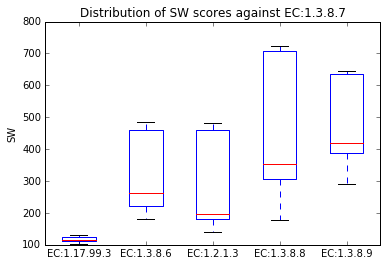

In [25]:
x_pos = [n + 1 for n in np.arange(len(all_data))]
plt.title("Distribution of SW scores against {0}".format(query))
plt.boxplot(all_data) 
plt.xticks(x_pos, all_keys)
plt.ylabel("SW")
plt.show()

In [28]:
dictionary = {}

In [29]:
dictionary

{}

In [31]:
dictionary.update({"apple":100})

In [32]:
dictionary

{'apple': 100}

In [33]:
dictionary.update({"orange":80})

In [34]:
dictionary

{'apple': 100, 'orange': 80}

In [35]:
dictionary.delete('apple')

AttributeError: 'dict' object has no attribute 'delete'

In [36]:
str = "This is a pen"

In [37]:
str

'This is a pen'

In [38]:
str.replace("pen", "penguin")

'This is a penguin'

In [39]:
str + "GGG"

'This is a penGGG'

In [40]:
dictionary

{'apple': 100, 'orange': 80}

In [41]:
del dictionary['apple']

In [42]:
dictionary

{'orange': 80}

In [44]:
dictionary.update({"kiwi": []})

In [45]:
dictionary

{'kiwi': [], 'orange': 80}

In [46]:
str

'This is a pen'

In [48]:
str.replace("a ", "")

'This is pen'

In [49]:
dictionary

{'kiwi': [], 'orange': 80}

In [50]:
dictionary['orange']

80

In [51]:
dictionary["kiwi"]

[]

In [52]:
dictionary["kiwi"].append(50)

In [53]:
dictionary

{'kiwi': [50], 'orange': 80}

In [54]:
dictionary['kiwi']

[50]

In [55]:
dictionary["kiwi"].append(500)

In [56]:
dictionary

{'kiwi': [50, 500], 'orange': 80}

In [57]:
dictionary['kiwi']

[50, 500]

In [58]:
dictionary['kiwi'][1]

500

In [59]:
dictionary["kiwi"].append(5000)

In [60]:
dictionary

{'kiwi': [50, 500, 5000], 'orange': 80}

In [61]:
for value in dictionary['kiwi']:
    print value

50
500
5000


In [62]:
[value for value in dictionary['kiwi']]

[50, 500, 5000]

In [63]:
dictionary['kiwi']

[50, 500, 5000]

In [64]:
[value + 10 for value in dictionary['kiwi']]

[60, 510, 5010]

In [65]:
new_list = []
for value in dictionary['kiwi']:
    new_list.append(value + 10)

In [66]:
new_list

[60, 510, 5010]

In [67]:
str = "This is a pen.\n"

In [68]:
str.split()

['This', 'is', 'a', 'pen.']

In [69]:
str.split("i")

['Th', 's ', 's a pen.\n']

In [70]:
str.split(" ")

['This', 'is', 'a', 'pen.\n']

In [71]:
for word in str.split():
    print word

This
is
a
pen.


In [72]:
dict = dictionary

In [73]:
dict

{'kiwi': [50, 500, 5000], 'orange': 80}

In [74]:
dict['orange'] = [30, 300, 3000]

In [75]:
d = {}

In [76]:
d.update({'Tokyo':{}})

In [77]:
d

{'Tokyo': {}}

In [78]:
d['Tokyo']

{}

In [80]:
d['Tokyo'].update({'Osaka':[]})

In [81]:
d

{'Tokyo': {'Osaka': []}}

In [82]:
d['Tokyo']

{'Osaka': []}

In [83]:
d['Tokyo']['Osaka']

[]

In [84]:
d['Tokyo']['Osaka'].append(100)

In [85]:
d

{'Tokyo': {'Osaka': [100]}}

In [86]:
d['Tokyo']['Osaka'].append(200)

In [87]:
d

{'Tokyo': {'Osaka': [100, 200]}}

In [88]:
d['Tokyo'].update({'Nagoya':[]})

In [89]:
d

{'Tokyo': {'Nagoya': [], 'Osaka': [100, 200]}}

In [90]:
d['Tokyo']['Osaka'].append(300)

In [91]:
d['Tokyo']['Nagoya'].append(400)

In [92]:
d

{'Tokyo': {'Nagoya': [400], 'Osaka': [100, 200, 300]}}

In [102]:
d = {'Tokyo': {'Nagoya': [400], 'Osaka': [100, 200, 300]},
    'Sapporo': {'Nagoya': [1400, 1500, 1600], 'Osaka': [1100, 1200, 1300]}}

In [103]:
for c1 in d:
    print c1

Sapporo
Tokyo


In [104]:
for c1 in d:
    print c1, d[c1]

Sapporo {'Osaka': [1100, 1200, 1300], 'Nagoya': [1400, 1500, 1600]}
Tokyo {'Osaka': [100, 200, 300], 'Nagoya': [400]}


In [105]:
for c1 in d:
    for c2 in d[c1]:
        print c1, c2, d[c1][c2]

Sapporo Osaka [1100, 1200, 1300]
Sapporo Nagoya [1400, 1500, 1600]
Tokyo Osaka [100, 200, 300]
Tokyo Nagoya [400]


In [106]:
d

{'Sapporo': {'Nagoya': [1400, 1500, 1600], 'Osaka': [1100, 1200, 1300]},
 'Tokyo': {'Nagoya': [400], 'Osaka': [100, 200, 300]}}

In [107]:
d['Sapporo']

{'Nagoya': [1400, 1500, 1600], 'Osaka': [1100, 1200, 1300]}

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

query = 'Sapporo'
all_keys = []
all_data = []
for c2 in d[query]:
    all_keys.append(c2)
    data = []
    data.append(np.array(d[query][c2]))
    all_data.append(data)
all_data

[[array([1100, 1200, 1300])], [array([1400, 1500, 1600])]]

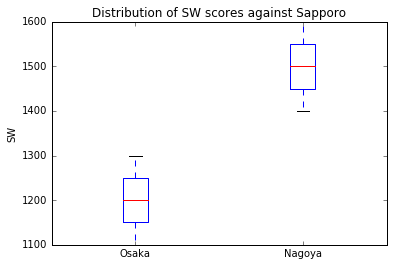

In [109]:
x_pos = [n + 1 for n in np.arange(len(all_data))]
plt.title("Distribution of SW scores against {0}".format(query))
plt.boxplot(all_data) 
plt.xticks(x_pos, all_keys)
plt.ylabel("SW")
plt.show()